In [ ]:
fulano_disse = input("Quando em producao nao funciona que o fulano diz: ")
if fulano_disse == "Na minha máquina funciona!":
   print("Use docker!")

In [ ]:
from IPython.display import Image
Image(filename='nasceu_docker.jpeg')

### Introdução

- Lançado em março de 2013
- Open Source
- Liguagem GO
- Criar, executar, testar e implementar apps...
- Virtualização a nível de SO
- Compartilha kernel do Host
- Compartilha binários/libs de outros conteiners
- Conteiner em execução = process(s) em execução = isolamento

#### Alguns links
https://academy.umbler.com/infografico-historia-dos-containers-ate-agora/

### Vantagens de uso

- Escalabilidade
- Agilidade
- Portabilidade
- Controle 
- Isolamento

### Componentes do Docker

- Docker for Mac
- Docker for Linux
- Docker for Windows
- Docker Engine
- Docker Hub
- Docker Compose

### Imagem e conteiner
- Imagem: base do container
- Container: instancia em tempo de execução da imagem
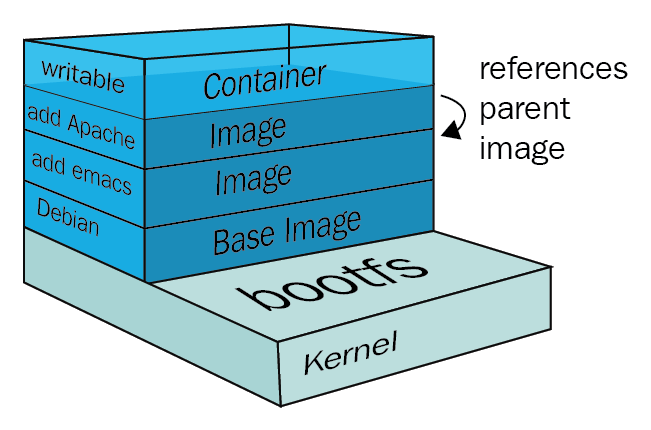

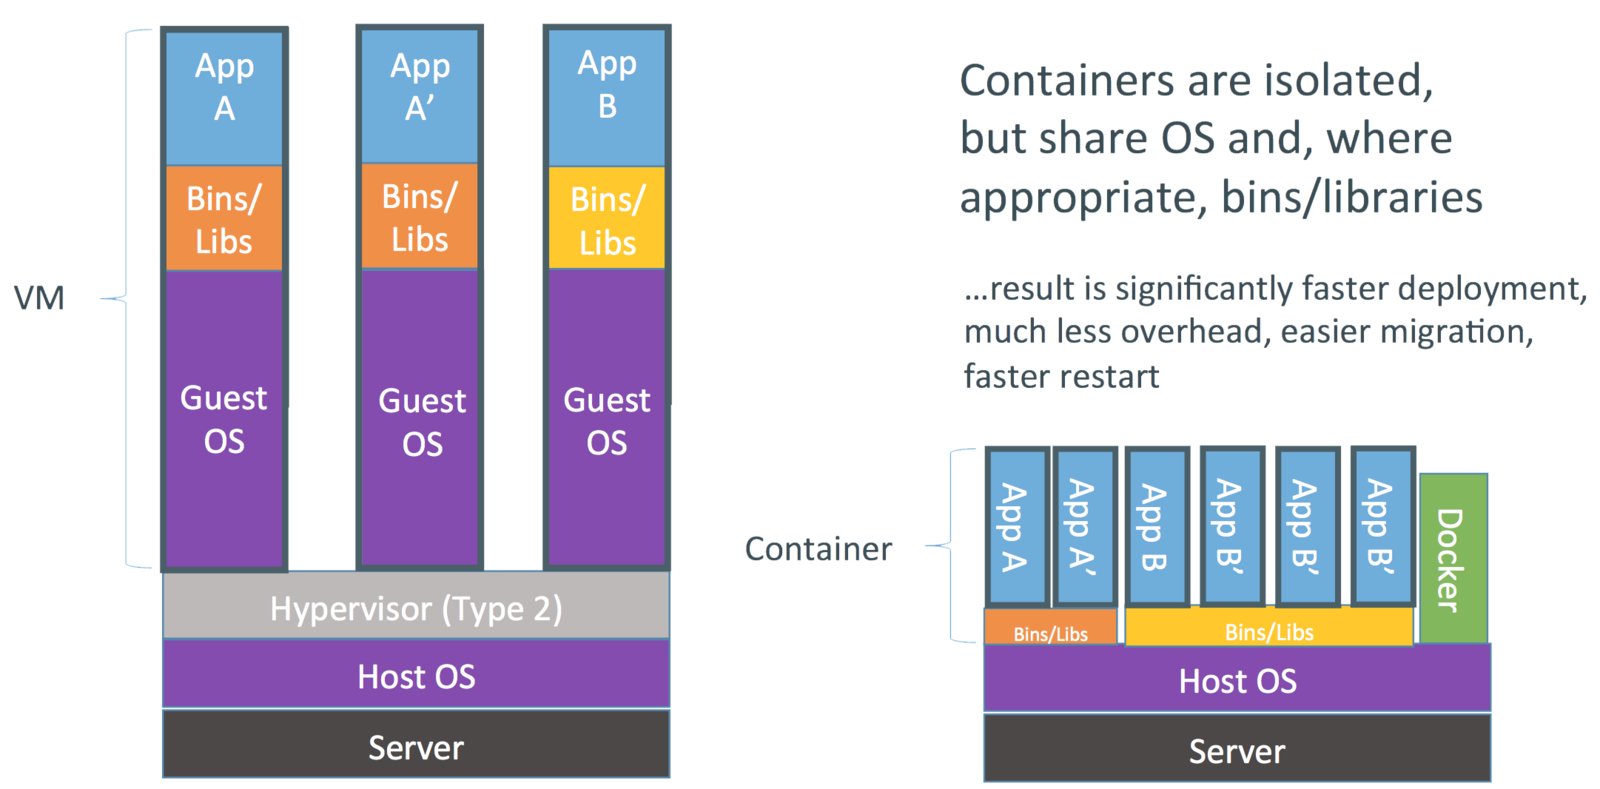

### Comandos basicos

In [ ]:
# Listar conteiners

!docker ps

In [ ]:
# Listar imagens

!docker images

In [ ]:
# Baixar uma imagem

# !docker pull image_name

!docker pull ubuntu

In [ ]:
# Apagar uma imagem

# docker rmi image_name
#!docker rmi ubuntu
#!docker images
#!docker tag ubuntu:0.0.1 ubuntu:latest

In [ ]:
# Criar e iniciar um conteiner
#!docker run -it --name container_name image_name command

# Criar, iniciar, executar comando e apagar conteiner
!docker run -it --name estudosDocker ubuntu bash

# Outro exemplo
#!docker run --rm -it python

In [ ]:
# Obter informações de um conteiner

# docker inspect <container>
!docker inspect --help

In [ ]:
# Apagar um conteiner

# docker rm container_name

!docker rm --help

In [ ]:
# Matar conteiners em execucao

# docker kill $(docker ps -q)

In [ ]:
# Matar conteiners suspensos

# docker rm $(docker ps -a -q)

### E se eu quiser manter as alteracoes?

In [ ]:
# docker commit conteiner_id image_name

# --> Para instanciar:

# docker run --rm -it <image_criada>

### E se eu quiser persistir os dados?

- Recomenda-se que conteiners não tenham dados

In [ ]:
#!docker volume create --name dados
!docker run -it -v dados:/tmp/dados python bash

### Criando imagens com Dockefile

### Alguns parametros para o Dockerfile:
    
- FROM
- MAINTAINER
- ADD
- COPY
- ENV
- EXPOSE
- LABEL
- USER
- WORKDIR
- VOLUME
- STOPSIGNAL
- ENTRYPOINT

In [ ]:
with open('Dockerfile', 'w') as df:
    df.writelines("FROM ubuntu\n")
    df.writelines("MAINTAINER Ruan Oliveira\n")
    df.writelines("RUN apt-get update\n")
    df.writelines("RUN apt-get install nginx -y\n")
    df.writelines('CMD ["nginx", "-g", "daemon off;"]\n')
    df.writelines("EXPOSE 80\n")

!cat Dockerfile

In [ ]:
# !docker build -t nginx .

# !docker images

# !docker run -d -p80:80 nginx

### Criando ambientes com Docker compose

- Gerenciamento de serviços

In [ ]:
# docker-compose up
# docker-compose up -d
!docker-compose --help

Apoio:
    
https://djangostars.com/blog/what-is-docker-and-how-to-use-it-with-python/

https://github.com/gomex/docker-python-exemplo

API Docker Python: 

https://www.mundodocker.com.br/docker-api-com-python/

Dockerfile example:

https://github.com/kstaken/dockerfile-examples

### Boas práticas na construção de imagem

- Construia containers o mais efêmero possível (https://12factor.net/processes)
- Entenda o contexto da aplicação
- Tente usar um .dockerignore
- Use quantos estágios forem necessário
- Use várias camadas? (RUN, COPY e ADD)
- Aproveite bem o cache de build (se uma camada é invalidada, toda a sequência é analisada!)

### Coisas comuns

- Copiar um arquivo em uma camada e apagar em outra
- Uso de imagens de terceiros sem uma análise prévia
- Colocar coisas na imagem pelo simples fato de "pode ser que precise"
- Sem desacoplamento de aplicação e subida de objetos desnecessários em um único container


### Multiplos estátios

#### Dockerfile

FROM golang:1.7.3 \
WORKDIR /go/src/github.com/alexellis/href-counter/ \
RUN go get -d -v golang.org/x/net/html  \
COPY app.go . \
RUN CGO_ENABLED=0 GOOS=linux go build -a -installsuffix cgo -o app . \

FROM alpine:latest   \
RUN apk --no-cache add ca-certificates \
WORKDIR /root/ \
COPY --from=0 /go/src/github.com/alexellis/href-counter/app . \
CMD ["./app"]  

### Use alias em multiplas chamadas FROM

FROM alpine:latest as builder \
RUN apk --no-cache add build-base

FROM builder as build1 \
COPY source1.cpp source.cpp \
RUN g++ -o /binary source.cpp

FROM builder as build2 \
COPY source2.cpp source.cpp \
RUN g++ -o /binary source.cpp

### Instrução RUN - exemplo de uso do cache.

### 1
FROM ubuntu:18.04 \
RUN apt-get update \
RUN apt-get install -y curl

### 2
FROM ubuntu:18.04 \
RUN apt-get update \
RUN apt-get install -y curl nginx

### Recomendação. O que vocâ acha?


RUN apt-get update && apt-get install -y \
    aufs-tools \
    automake \
    build-essential \
    curl \
    dpkg-sig \
    libcap-dev \
    libsqlite3-dev \
    mercurial \
    reprepro \
    ruby1.9.1 \
    ruby1.9.1-dev \
    s3cmd=1.1.* \
 && rm -rf /var/lib/apt/lists/*